In [10]:
# Import libraries
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import h5py

In [11]:
def get_events_hits(path):
    # Open the H5 file
    with h5py.File(path, 'r') as f:
        # Get the 'event_ids' and 'event_hits_index' datasets
        event_ids = f['event_ids'][()]
        event_hits_index = f['event_hits_index'][()]

        # Create a list to store the tuples
        event_hit_counts = []

        # Get list of positions
        positions = f['positions'][()]

        # Iterate over each event
        for i in range(len(event_ids)):
            # Get the starting and ending indices for hits of the current event
            start_index = event_hits_index[i]
            end_index = event_hits_index[i+1] if i < len(event_ids) - 1 else len(f['hit_charge'])

            # Compute the number of hits for the current event
            hit_count = end_index - start_index

            # Create a tuple with the event index and the hit count, and append it to the list
            event_hit_counts.append((i, hit_count))
            
    return event_hit_counts, positions

In [12]:
## DEFINE PATHS HERE:
# e particle path
e_path = "./data/IWCD_mPMT_Short_e-_E0to1000MeV_unif-pos-R400-y300cm_4pi-dir_3000evts_0.h5"
# # muon particle path
# m_path = "./data/IWCD_mPMT_Short_mu-_E0to1000MeV_unif-pos-R400-y300cm_4pi-dir_3000evts_0.h5"
# # gamma particle path
# g_path = "./data/IWCD_gamma.h5"
# # pion particle path
# p_path = "./data/IWCD_mPMT_Short_pi0_E0to1000MeV_unif-pos-R400-y300cm_4pi-dir_3000evts_0.h5"

# get e-particle events hits
event_hit_counts_e, positions_e = get_events_hits(e_path)
# # get muon-particle events hits
# event_hit_counts_m, charges_m = get_events_hits(m_path)
# # get gamma-particle events hits
# event_hit_counts_g, charges_g = get_events_hits(g_path)
# # get pion-particle events hits
# event_hit_counts_p, charges_p = get_events_hits(p_path)

[array([-250.65918,  235.39148, -137.34627], dtype=float32), array([-117.36474,  108.4042 , -311.18503], dtype=float32), array([-256.61517, -144.99518, -222.33963], dtype=float32), array([ 34.820843, 123.63288 , 175.90103 ], dtype=float32), array([-171.32411,  -96.39079, -126.40972], dtype=float32), array([255.27892,  80.01573, 248.84076], dtype=float32), array([ 49.692963,  71.77899 , -18.53218 ], dtype=float32), array([-369.84467 ,  -58.846485,  -52.17762 ], dtype=float32), array([228.04408 , -97.179794,  33.814144], dtype=float32), array([ 45.030308,  68.86647 , 261.3687  ], dtype=float32), array([ 273.40582, -171.19643, -198.52452], dtype=float32), array([  31.79741, -199.31592, -132.98798], dtype=float32), array([-298.19037 ,  149.83635 ,  -24.149227], dtype=float32), array([ 140.66954, -128.62025,  181.74239], dtype=float32), array([137.7324 , 200.16432, 144.43842], dtype=float32), array([ -94.4171   ,    9.8490715, -287.94354  ], dtype=float32), array([-266.10126 ,   24.278105, 

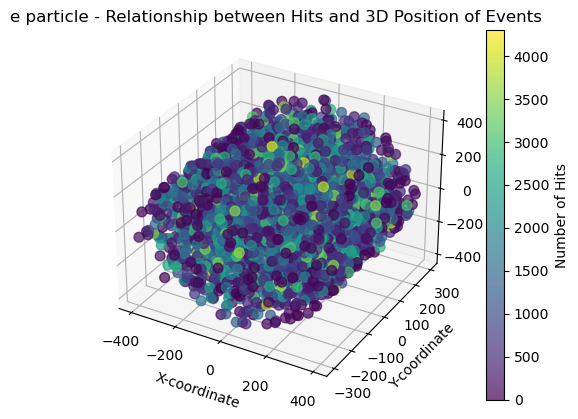

In [13]:
# Step 1: Extract information from datasets
event_ids_e = [event[0] for event in event_hit_counts_e]
total_hits_e = [event[1] for event in event_hit_counts_e]
np_positions_e = np.array(positions_e)  # Convert positions to a NumPy array

# # Step 2: Filter events with major number of hits
# threshold = 2000  # Minimum number of hits required to consider an event as having a major number of hits
# filtered_events_e = [(event_id, hits) for event_id, hits in zip(event_ids_e, total_hits_e) if hits > threshold]

# Step 2: Extract positions of all events
event_positions_e = [np_positions_e[event_ids_e.index(event_id)][0] for event_id in event_ids_e]

# # Step 3: Extract positions of filtered events
# filtered_positions_e = [positions_e[event_ids_e.index(event[0])] for event in filtered_events_e]

# Step 4: Visualize the relationship between hits and positions
x = [pos[0] for pos in event_positions_e]
y = [pos[1] for pos in event_positions_e]
z = [pos[2] for pos in event_positions_e]
# hits = [event[1] for event in filtered_events_e]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=total_hits_e, cmap='viridis', s=50, alpha=0.7)
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('Z-coordinate')
ax.set_title('e particle - Relationship between Hits and 3D Position of Events')
fig.colorbar(scatter, label='Number of Hits')

plt.show()


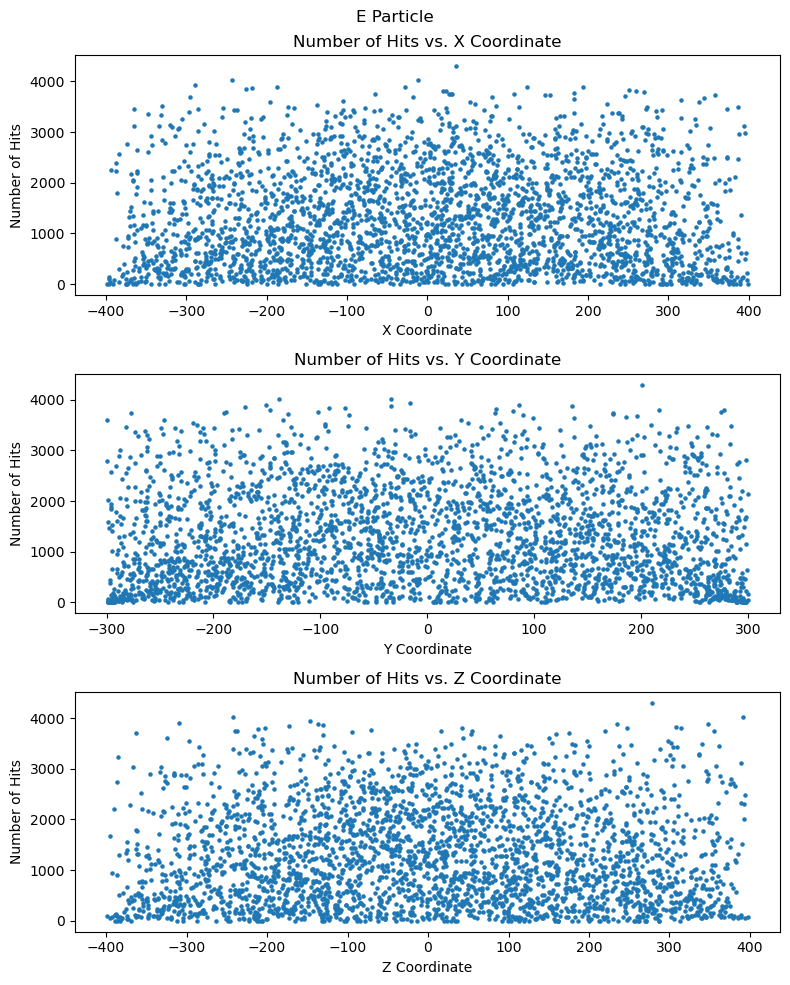

In [14]:
event_ids = [event[0] for event in event_hit_counts_e]
hits = [event[1] for event in event_hit_counts_e]

positions_array = np.array(positions_e)

# Extract x, y, z coordinates
x = positions_array[:, :, 0].flatten()
y = positions_array[:, :, 1].flatten()
z = positions_array[:, :, 2].flatten()

# Create separate subplots for each coordinate
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Plot for x coordinate
axs[0].scatter(x, hits, s=5)
axs[0].set_xlabel('X Coordinate')
axs[0].set_ylabel('Number of Hits')
axs[0].set_title('Number of Hits vs. X Coordinate')

# Plot for y coordinate
axs[1].scatter(y, hits, s=5)
axs[1].set_xlabel('Y Coordinate')
axs[1].set_ylabel('Number of Hits')
axs[1].set_title('Number of Hits vs. Y Coordinate')

# Plot for z coordinate
axs[2].scatter(z, hits, s=5)
axs[2].set_xlabel('Z Coordinate')
axs[2].set_ylabel('Number of Hits')
axs[2].set_title('Number of Hits vs. Z Coordinate')

# Add title
plt.suptitle('E Particle')

# Adjust the spacing between subplots
plt.tight_layout()

plt.show()


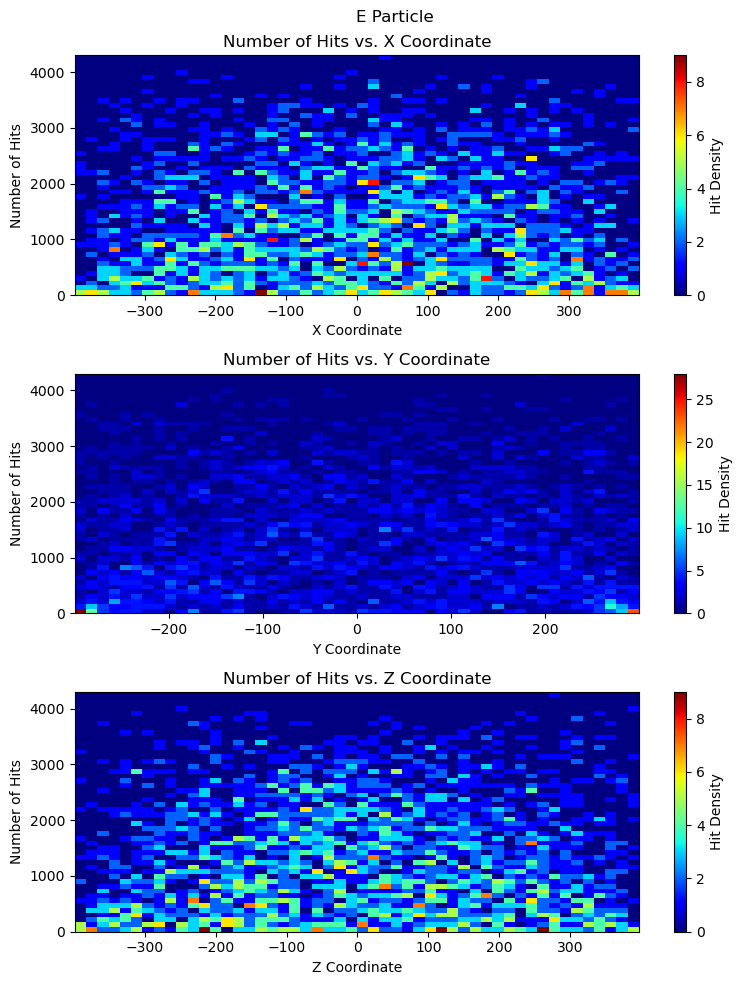

In [15]:
# Create separate subplots for each coordinate
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Plot for x coordinate
im1 = axs[0].hist2d(x, hits, bins=(50, 50), cmap=plt.cm.jet)
axs[0].set_xlabel('X Coordinate')
axs[0].set_ylabel('Number of Hits')
axs[0].set_title('Number of Hits vs. X Coordinate')
cbar1 = plt.colorbar(im1[3], ax=axs[0])
cbar1.set_label('Hit Density')

# Plot for y coordinate
im2 = axs[1].hist2d(y, hits, bins=(50, 50), cmap=plt.cm.jet)
axs[1].set_xlabel('Y Coordinate')
axs[1].set_ylabel('Number of Hits')
axs[1].set_title('Number of Hits vs. Y Coordinate')
cbar2 = plt.colorbar(im2[3], ax=axs[1])
cbar2.set_label('Hit Density')

# Plot for z coordinate
im3 = axs[2].hist2d(z, hits, bins=(50, 50), cmap=plt.cm.jet)
axs[2].set_xlabel('Z Coordinate')
axs[2].set_ylabel('Number of Hits')
axs[2].set_title('Number of Hits vs. Z Coordinate')
cbar3 = plt.colorbar(im3[3], ax=axs[2])
cbar3.set_label('Hit Density')

# Add title
plt.suptitle('E Particle')

# Adjust the spacing between subplots
plt.tight_layout()

plt.show()

In [18]:
# Convert positions to numpy array for easier manipulation
positions = np.array([pos[0] for pos in positions_e])

# Create a 3D density plot
fig = go.Figure(data=go.Scatter3d(
    x=positions[:, 0],
    y=positions[:, 1],
    z=positions[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        opacity=0.5,
        colorscale='Viridis'
    )
))

fig.update_layout(
    title='Density of Hits in 3D Space',
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Z Coordinate'
    )
)

# Save the plot as an HTML file
fig.write_html('density_plot.html')